# Problem Statement

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time.

Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. 

The Dataset contains about 10 years of daily weather observations of different locations in Australia. 

Here, predict two things:

#Need to predict

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.


b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

# Dataset Description:

1)Date  - The date of observation

2)Location  -The common name of the location of the weather station

3)MinTemp  -The minimum temperature in degrees celsius

4)MaxTemp -The maximum temperature in degrees celsius

5)Rainfall  -The amount of rainfall recorded for the day in mm

6)Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

7)Sunshine  -The number of hours of bright sunshine in the day.

8)WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

9)WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

10)WindDir9am -Direction of the wind at 9am

11)WindDir3pm -Direction of the wind at 3pm

12)WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

13)WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

14) -Humidity (percent) at 9am

15)Humidity3pm -Humidity (percent) at 3pm

16)Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 

17)Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

18)Cloud9am - Fraction of sky obscured by cloud at 9am. 

19) -Fraction of sky obscured by cloud 

20)Temp9am-Temperature (degrees C) at 9am

21)Temp3pm -Temperature (degrees C) at 3pm

22)RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    
23)RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [2]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Exploration

In [3]:
df.shape

(8425, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Text(0.5, 1.0, 'type of our data')

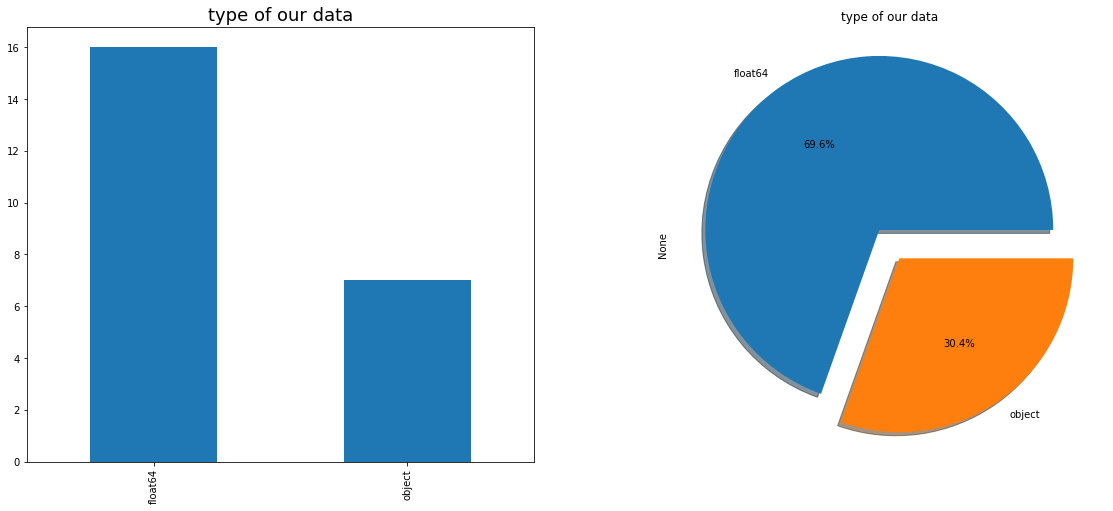

In [5]:
import matplotlib.pyplot as plt

fig,axarr=plt.subplots(1,2,figsize=(20,8))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("types of our data",fontsize=18)
df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data",fontsize=18)

In [6]:
# Rain Day and Rain Tommarrow are objects (yes/no).I will convert them into binary (1/0) for our convience

df['RainToday'].replace({'No':0,'Yes':1},inplace=True)
df['RainTomorrow'].replace({'No':0,'Yes':1},inplace = True)

* Next we will check if the dataset is unbalanced or balanced.If the data set in unblanced, we need to either downsample the majority or oversample the minority to balance it.

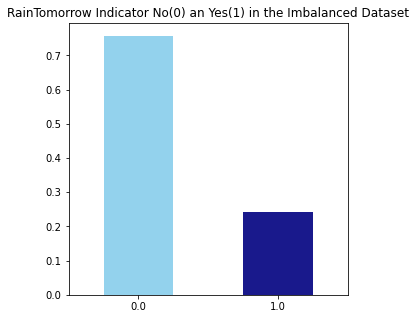

In [7]:
fig=plt.figure(figsize=(5,5))
df.RainTomorrow.value_counts(normalize=True).plot(kind='bar',color=['skyblue','navy'],alpha=0.9,rot=0)
plt.title('RainTomorrow Indicator No(0) an Yes(1) in the Imbalanced Dataset')
plt.show()

* we can observe that the presence of  'O'and '1' is alomost 78:22 ratio.So there is class imbalance  and we have to deal with it.
 
To fight against the class imbalance,we will use here to oversampling of the minority class.

Since  the size of dataset is quite small,majority class sub sampling wouln't make much sense here
    

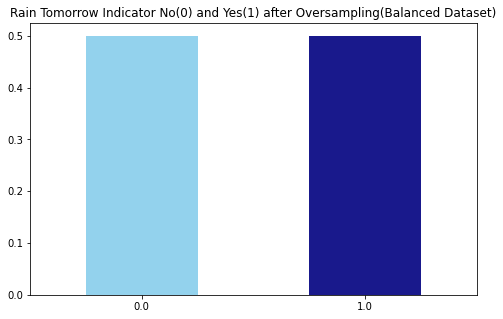

In [8]:
# Handling class imbalance for RainFall prediction

from sklearn.utils import resample

no=df[df.RainTomorrow==0]

yes=df[df.RainTomorrow==1]

yes_oversampled=resample(yes,replace=True,n_samples=len(no),random_state=123)

oversampled=pd.concat([no,yes_oversampled])

fig=plt.figure(figsize=(8,5))
oversampled.RainTomorrow.value_counts(normalize=True).plot(kind='bar',color=['skyblue','navy'],alpha=0.9,rot=0)

plt.title('Rain Tomorrow Indicator No(0) and Yes(1) after Oversampling(Balanced Dataset)')
plt.show()

In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

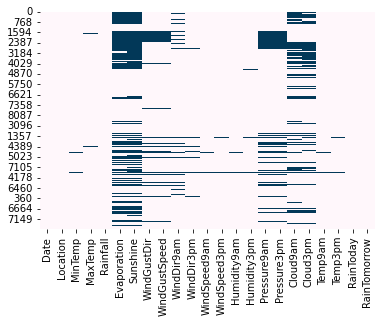

In [10]:
#plotting missing data

import seaborn as sns
sns.heatmap(oversampled.isnull(),cbar=False,cmap='PuBu')

* Obviously,'Evoparation','Sunshine','Cloud9am','Cloud3pm' are the featurs with a high missing percentage.So we will check the details of missing data for these 4 features

In [11]:
total=oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing.head(4)

,Total,Percent
Sunshine,5886,0.475061
Evaporation,5186,0.418563
Cloud9am,3202,0.258434
Cloud3pm,3197,0.258031


* We observe that the 4  feature have less than 50% missing data.So instead of rejecting them completely, we will consider them in our model with proper imputation 

# Imputation and Transformation

In [12]:
 df.select_dtypes(include=['object']).columns       

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [13]:
# Filling the null values of numerical variables

numerical_feature = [feature for feature in df.columns if df[feature].dtypes !='O']
print('Numarical Value count {}'.format(len(numerical_feature)))
print(numerical_feature)

Numarical Value count 18
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [14]:
# Imputing categorial variable with mode
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [15]:
#Convert Categorial features into continues featrues

from sklearn.preprocessing import LabelEncoder
l_encoder={}
for col in df.select_dtypes(include=['object']).columns:
    l_encoder[col]=LabelEncoder()
    df[col]=l_encoder[col].fit_transform(df[col])

In [16]:
#filling null values for numerical variables

df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [17]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,3000,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,3001,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,3002,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


In [18]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

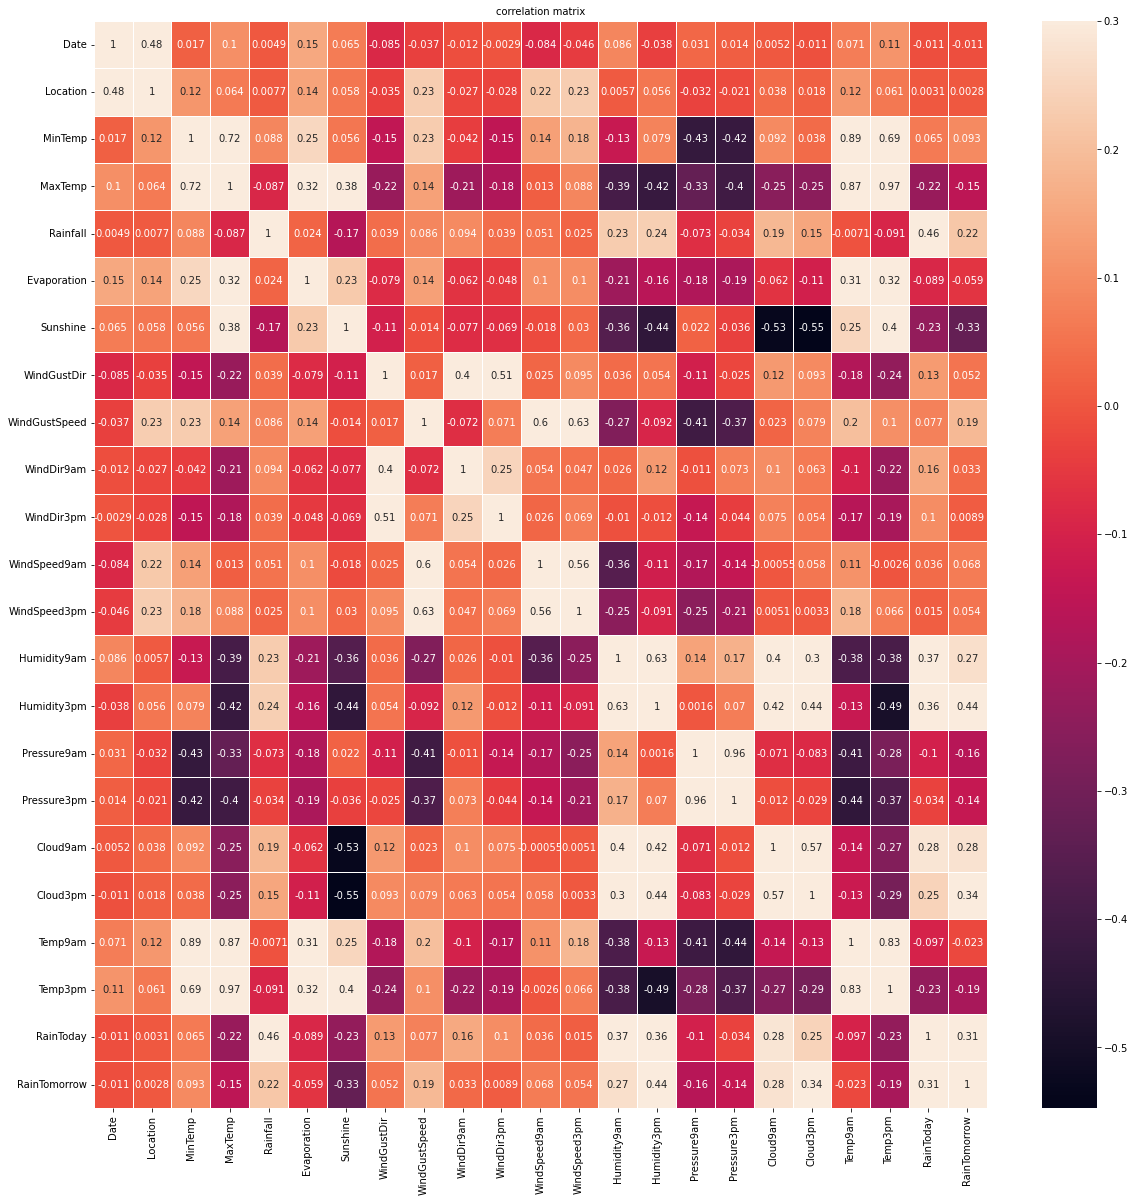

In [19]:
# plotting Correlation heat map

import numpy as np

corr_matrix=df.corr()

fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix,vmax=.3,annot=True,linewidths=.5)
plt.title('correlation matrix',fontsize=10)
plt.show()

* The following feature pairs are strongly correlated

  * MaxTemp and min Temp
  * Pressure 9h and Pressure 3h
  * Temp9am and Temp3pm
  * Evoparation and max temparature
  * MaxTemp and Temp3pm But in no case is the correlation value equal to perfect "1".We are therefore not removing any functionality

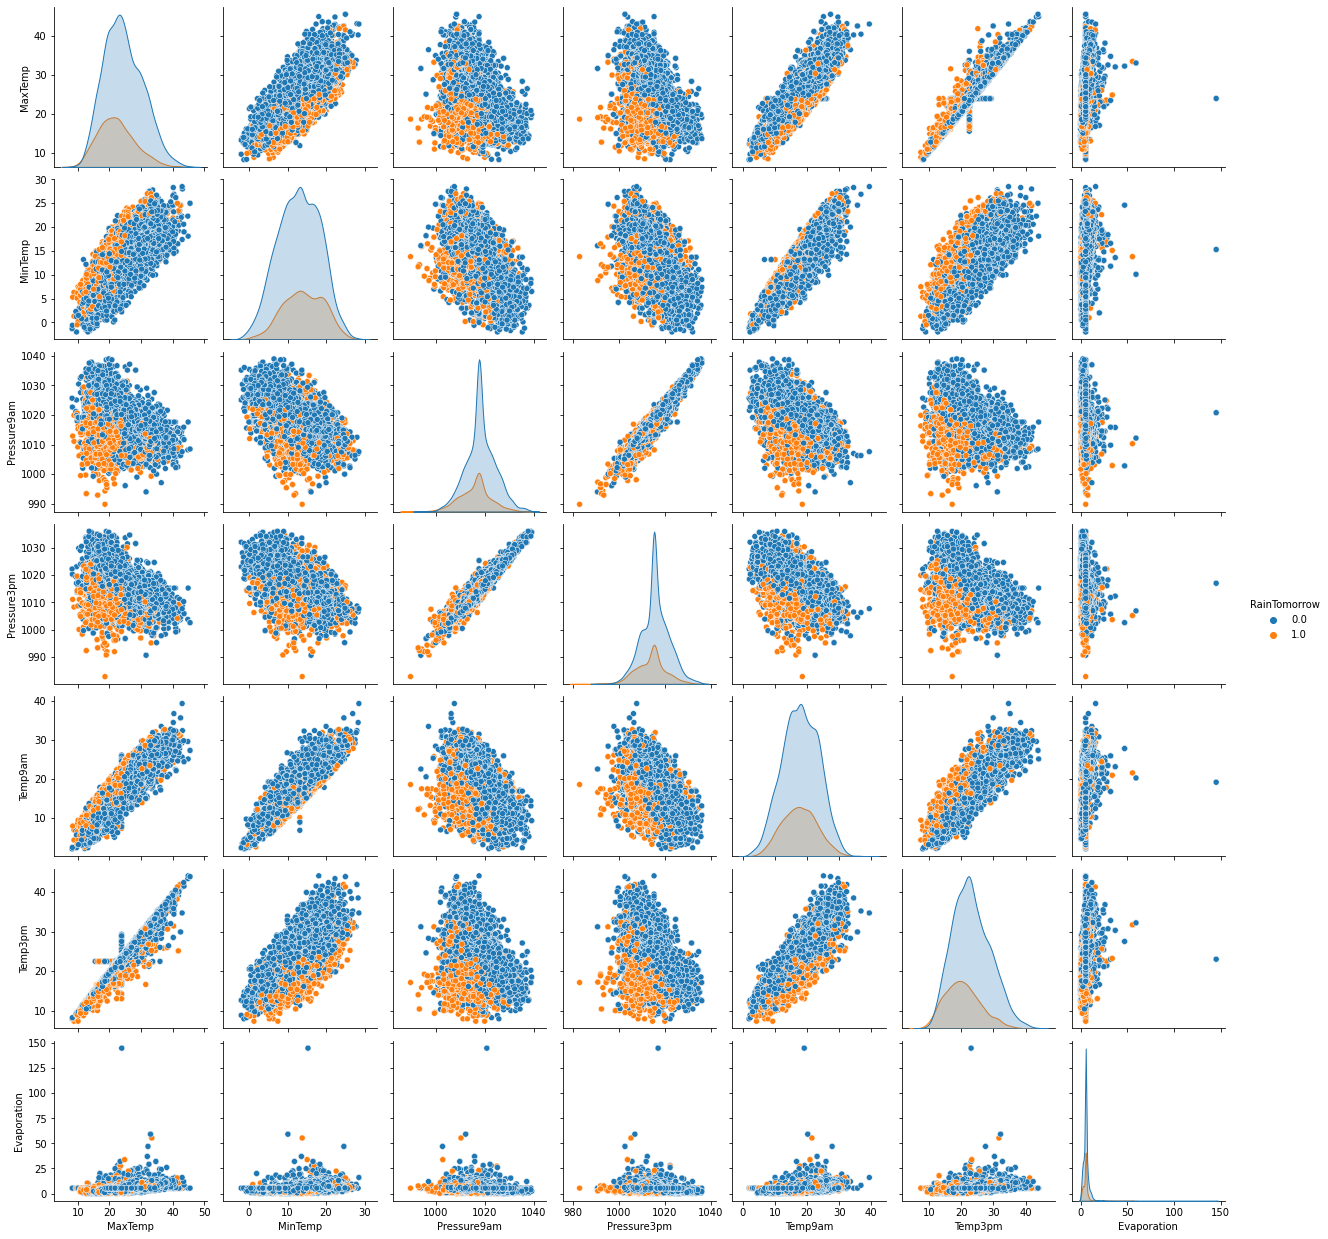

In [20]:
# plotting graph for to see pair wise correlation

sns.pairplot(data=df,vars = ('MaxTemp','MinTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Evaporation'),hue='RainTomorrow')

# Standardizing the data

In [21]:
X=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=12345)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


# Logistic Regression model building

In [22]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()
logR_model=logR.fit(X_train,y_train)
logR_model

LogisticRegression()

In [23]:
y_pred_logR=logR_model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_test,y_pred_logR)

0.8322784810126582

<AxesSubplot:>

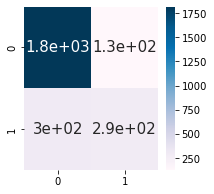

In [24]:
#Confusion Matrix

cm=confusion_matrix(y_test,y_pred_logR)
plt.rcParams['figure.figsize']=(3,3)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

In [25]:
print('Training Accuracy:',logR_model.score(X_train,y_train))
print('Testing Accuracy:',logR_model.score(X_test,y_test))

Training Accuracy: 0.8341529591317619
Testing Accuracy: 0.8322784810126582


In [26]:
cross_val_score(logR_model,X_test,y_test,cv=10).mean()

0.8291109856327248

In [27]:
print(classification_report(y_test,y_pred_logR))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      1945
         1.0       0.69      0.49      0.58       583

    accuracy                           0.83      2528
   macro avg       0.78      0.71      0.74      2528
weighted avg       0.82      0.83      0.82      2528



# KNN Model Building

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [29]:
y_pred_knn=knn_model.predict(X_test)


In [30]:
accuracy_score(y_test,y_pred_knn)

0.8279272151898734

<AxesSubplot:>

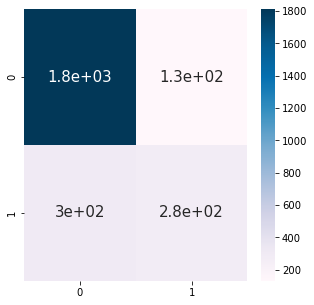

In [31]:
#Confusion matrix

cm=confusion_matrix(y_test,y_pred_knn)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

In [32]:
print(classification_report(y_test,y_pred_knn))


              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      1945
         1.0       0.68      0.48      0.56       583

    accuracy                           0.83      2528
   macro avg       0.77      0.71      0.73      2528
weighted avg       0.82      0.83      0.82      2528



# Model Tuning

In [33]:
knn_params={'n_neighbors':np.arange(1,50)}

In [34]:
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [35]:
print('Best Score:'+str(knn_cv.best_score_))
print('Best Score:'+str(knn_cv.best_params_))

Best Score:0.8445014531955914
Best Score:{'n_neighbors': 1}


In [36]:
knn=KNeighborsClassifier(1)
knn_tuned=knn.fit(X_train,y_train)

In [37]:
knn_tuned.score(X_test,y_test)

0.8405854430379747

In [38]:
y_pred_tuned=knn_tuned.predict(X_test)

<AxesSubplot:>

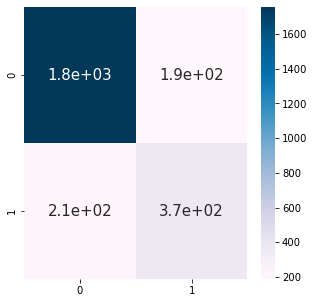

In [39]:
#Confusion matrix

cm=confusion_matrix(y_test,y_pred_tuned)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

# RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(X_train,y_train)
rf_model




RandomForestClassifier()

In [41]:
y_pred_rf=rf_model.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.8785601265822784

<AxesSubplot:>

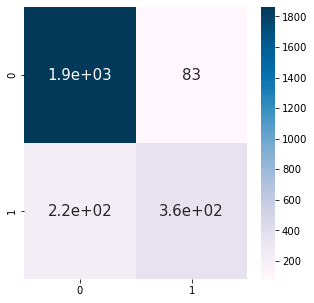

In [42]:
# Confusion matrix

cm=confusion_matrix(y_test,y_pred_rf)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

In [43]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      1945
         1.0       0.81      0.62      0.70       583

    accuracy                           0.88      2528
   macro avg       0.85      0.79      0.81      2528
weighted avg       0.87      0.88      0.87      2528



# Model_tuning

In [44]:
rf_params={'max_depth':[2,5,8,10],
          'max_features':[2,5,8],
          'n_estimators':[10,500,1000],
          'min_samples_split':[2,5,10]}


In [45]:
rf_model=RandomForestClassifier()
rf_cv=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_cv_model=rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [46]:
print('Best Params:'+str(rf_cv_model.best_params_))


Best Params:{'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [47]:
rf_tuned=RandomForestClassifier(max_depth=10,max_features=8,min_samples_split= 2,n_estimators=500)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=500)

In [48]:
y_pred_tuned=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred_tuned)

0.8639240506329114

<AxesSubplot:>

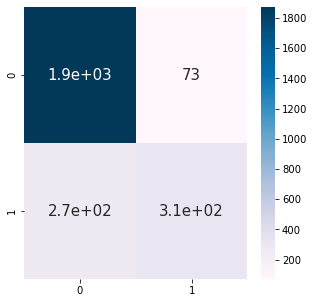

In [49]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred_tuned)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

# Gaussian Naive bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb_model=nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [51]:
y_pred_nb=nb_model.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred_nb)

0.7954905063291139

<AxesSubplot:>

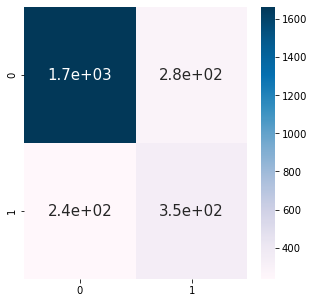

In [53]:
# Confusion matrix

cm=confusion_matrix(y_test,y_pred_nb)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

In [54]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1945
         1.0       0.55      0.60      0.57       583

    accuracy                           0.80      2528
   macro avg       0.71      0.73      0.72      2528
weighted avg       0.80      0.80      0.80      2528



In [55]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()

0.7919223288788506

# Support Vector Classifier


In [56]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear').fit(X_train,y_train)

In [57]:
y_pred=svm_model.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.8299050632911392

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      1945
         1.0       0.70      0.47      0.56       583

    accuracy                           0.83      2528
   macro avg       0.78      0.70      0.73      2528
weighted avg       0.82      0.83      0.82      2528



<AxesSubplot:>

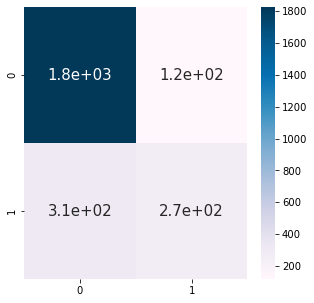

In [60]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(cm,annot=True,annot_kws={'size':15},cmap='PuBu')

In [61]:
# Model comparision

models=[logR,knn_tuned,rf_tuned,nb_model,svm_model]

for model in models:
    names = model.__class__.__name__
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('-'*28)
    print(names+":")
    print("Accuracy:{:.4%}".format(accuracy))

----------------------------
LogisticRegression:
Accuracy:83.2278%
----------------------------
KNeighborsClassifier:
Accuracy:84.0585%
----------------------------
RandomForestClassifier:
Accuracy:86.3924%
----------------------------
GaussianNB:
Accuracy:79.5491%
----------------------------
SVC:
Accuracy:82.9905%


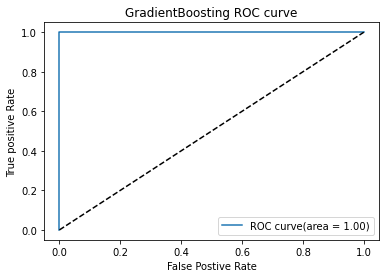

In [67]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(y_train,rf.predict_proba(X_train)[:,1])
roc_auc =  auc(fpr,tpr)

plt.figure(figsize=[6,4])
plt.plot(fpr,tpr,label='ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Postive Rate')
plt.ylabel('True positive Rate')
plt.title('GradientBoosting ROC curve')
plt.legend(loc='lower right')
plt.show()

# Saving best perfoming model why because it has covered huge area under curve comparing to other models

In [68]:
import pickle

pickle.dump(RandomForestClassifier,open('RandomForest_model','wb'))

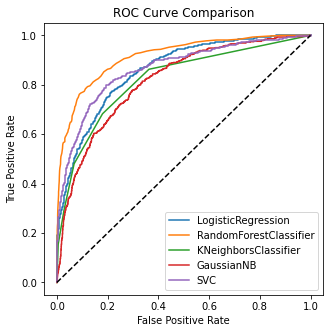

In [70]:
from sklearn.metrics import plot_roc_curve 

# Create a list of models
models = [
    LogisticRegression(),
    RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),SVC()
    
]

# Create the plot and axis object
fig, ax = plt.subplots()

# Plot the ROC curve for each model
for model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    # Plot the ROC curve
    plot_roc_curve(model, X_test, y_test, ax=ax, label=str(type(model)).split('.')[-1][:-2])

# Add the random classifier line
ax.plot([0, 1], [0, 1], color='black', linestyle='--')

# Add labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve Comparison')
ax.legend()

# Show the plot
plt.show()

